#**Desafio de Ciência de Dados - IMDb - Indicium Lighthouse 2025**
##Nome: Camila Siqueira Silva

##**Introdução**

###Este notebook contém a análise completa para o desafio de Ciência de Dados do programa Lighthouse. O objetivo é explorar um dataset de filmes do IMDb para extrair insights de negócio e, ao final, construir um modelo de Machine Learning para prever a nota de um filme.

##**Configuração inicial / bibliotecas importadas / carregamento dos dados**

In [1]:
# Configuração Inicial: Bibliotecas e Carregamento dos Dados

# Importação de libs
import warnings
warnings.filterwarnings('ignore')

# Para manipulação de dados
import pandas as pd
import numpy as np

# Para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from wordcloud import WordCloud

# Para modelagem de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Para exibição de tabelas e outputs no notebook
from IPython.display import display


# Carregamento dos dados
df = pd.read_csv('../data/desafio_indicium_imdb.csv')

##**Visão geral**

In [2]:
# Visão geral do df
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [3]:
# Informações sobre as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


In [4]:
# Estatísticas descritivas das variáveis númericas
df.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


In [5]:
# Estatísticas descritivas das variáveis categóricas
df.describe(include='object')

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross
count,999,999,898,999,999,999,999,999,999,999,999,830
unique,998,100,16,140,202,999,548,659,840,890,938,822
top,Drishyam,2014,U,130 min,Drama,An organized crime dynasty's aging patriarch t...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,"4,360,000"
freq,2,32,234,23,84,1,14,12,7,5,4,5


In [6]:
# Verificando dados duplicados
df.duplicated().sum()

0

##**Limpeza e preparação**

In [7]:
# Limpando a coluna 'Gross' para remover as virgulas e convertendo para float
df['Gross'] = df['Gross'].str.replace(',', '', regex=True).astype(float)

In [8]:
# Limpando a coluna 'Runtime' para remover o ' min' e converter para int
df['Runtime'] = df['Runtime'].str.replace(' min', '', regex=True).astype(int)

In [9]:
# Removendo a coluna 'Unnamed: 0' que é apenas indíce e não será utilizada na análise
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


**Estratégia de Preparação de Dados: Dois DataFrames para Duas Finalidades**

Para garantir a robustez tanto da Análise Exploratória (EDA) quanto da Modelagem Preditiva, adotei uma estratégia de criar dois DataFrames distintos a partir dos dados limpos:

* **df_imputed (O DataFrame para Modelagem e EDA Geral):**
Este é o conjunto de dados principal. Nele, os valores ausentes de colunas numéricas (Gross, Meta_score) foram preenchidos (imputados) utilizando a mediana. Esta etapa é essencial para o treinamento dos modelos de Machine Learning, que não funcionam com dados faltantes. Este DataFrame será usado para a maior parte da EDA e para toda a etapa de modelagem.

* **df_original_gross (O DataFrame para Análise de Faturamento):**
Para análises específicas que buscam entender a verdadeira distribuição e as estatísticas do faturamento (a principal variável de negócio), usar dados imputados poderia gerar conclusões enganosas. Por exemplo, o cálculo do faturamento mediano por gênero seria distorcido. Para evitar isso, este segundo DataFrame foi criado removendo-se as linhas que não continham o dado original de faturamento. Ele será usado exclusivamente para garantir a precisão e a honestidade nas análises que envolvem estatísticas agrupadas de Gross.

In [10]:
# Preparação dos Dados: Criação dos DataFrames para Análise

# DataFrame 1: df_imputed (para a maioria da EDA e TODA a modelagem)
df_imputed = df.copy()

# Tratamento de valores ausentes com a mediana
df_imputed['Gross'].fillna(df['Gross'].median(), inplace=True)
df_imputed['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)

# Criando colunas de visualização
df_imputed['Gross_Millions'] = df_imputed['Gross'] / 1000000
df_imputed['Votes_in_Thousands'] = df_imputed['No_of_Votes'] / 1000
print("DataFrame 'df_imputed' (para modelagem) criado com sucesso.")


# DataFrame 2: df_original_gross (apenas para análises honestas de faturamento)
df_original_gross = df.copy()

# Removi as linhas onde o faturamento original era ausente
df_original_gross.dropna(subset=['Gross'], inplace=True)

# Também tratei o Meta_score para facilitar análises futuras neste df
df_original_gross['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)

# Criando as mesmas colunas de visualização para consistência
df_original_gross['Gross_Millions'] = df_original_gross['Gross'] / 1000000
df_original_gross['Votes_in_Thousands'] = df_original_gross['No_of_Votes'] / 1000
print("DataFrame 'df_original_gross' (para análise de faturamento) criado com sucesso.")
print("-" * 50)

# Verificando a diferença no número de linhas
print(f"O 'df_imputed' tem {len(df_imputed)} linhas.")
print(f"O 'df_original_gross' tem {len(df_original_gross)} linhas (apenas com dados de faturamento reais).")

DataFrame 'df_imputed' (para modelagem) criado com sucesso.
DataFrame 'df_original_gross' (para análise de faturamento) criado com sucesso.
--------------------------------------------------
O 'df_imputed' tem 999 linhas.
O 'df_original_gross' tem 830 linhas (apenas com dados de faturamento reais).


Obs: no tratamento de valores ausentes, neste caso, estou utilizando a mediana, pois ela não é afetada por valores extremos ou outliers (ex: Filme Avatar). O faturamento de um filme recordista não muda a mediana, que continua a representar o valor do meio da lista de filmes, já que a distribuição de faturamento e notas pode ser bastante variada. Dessa forma, acredito que a mediana seja uma medida mais realista.

##**Questão 1: Análise exploratória dos dados (EDA)**

###A seguir, apresento a análise exploratória. O objetivo é entender a distribuição das principais variáveis, identificar outliers e visualizar a relação entre elas para gerar hipóteses.

In [11]:
# Detectando Outliers de Faturamento com o Método IQR

print("--- Análise de Outliers de Faturamento (baseada em dados reais) ---")

# Calculando Q1, Q3 e IQR
Q1 = df_original_gross['Gross_Millions'].quantile(0.25)
Q3 = df_original_gross['Gross_Millions'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Limite Superior para Faturamento: ${limite_superior:.2f} Milhões")
print(f"Limite Inferior para Faturamento: ${limite_inferior:.2f} Milhões")

# Filtrando o DataFrame para encontrar os outliers
outliers_faturamento = df_original_gross[
    (df_original_gross['Gross_Millions'] < limite_inferior) |
    (df_original_gross['Gross_Millions'] > limite_superior)
]

print(f"\nEncontrados {len(outliers_faturamento)} outliers de faturamento.")

# Mostrando os 10 maiores outliers
print("Top 10 Maiores Outliers de Faturamento:")
display(outliers_faturamento[['Series_Title', 'Gross_Millions', 'IMDB_Rating', 'Genre']].sort_values(by='Gross_Millions', ascending=False).head(10))

--- Análise de Outliers de Faturamento (baseada em dados reais) ---
Limite Superior para Faturamento: $197.32 Milhões
Limite Inferior para Faturamento: $-113.20 Milhões

Encontrados 88 outliers de faturamento.
Top 10 Maiores Outliers de Faturamento:


,Series_Title,Gross_Millions,IMDB_Rating,Genre
476,Star Wars: Episode VII - The Force Awakens,936.662225,7.9,"Action, Adventure, Sci-Fi"
58,Avengers: Endgame,858.373000,8.4,"Action, Adventure, Drama"
622,Avatar,760.507625,7.8,"Action, Adventure, Fantasy"
59,Avengers: Infinity War,678.815482,8.4,"Action, Adventure, Sci-Fi"
651,Titanic,659.325379,7.8,"Drama, Romance"
356,The Avengers,623.279547,8.0,"Action, Adventure, Sci-Fi"
890,Incredibles 2,608.581744,7.6,"Animation, Action, Adventure"
1,The Dark Knight,534.858444,9.0,"Action, Crime, Drama"
581,Rogue One,532.177324,7.8,"Action, Adventure, Sci-Fi"
62,The Dark Knight Rises,448.139099,8.4,"Action, Adventure"


Média do Faturamento (Dados Reais): $68.08 Milhões
Mediana do Faturamento (Dados Reais): $23.46 Milhões


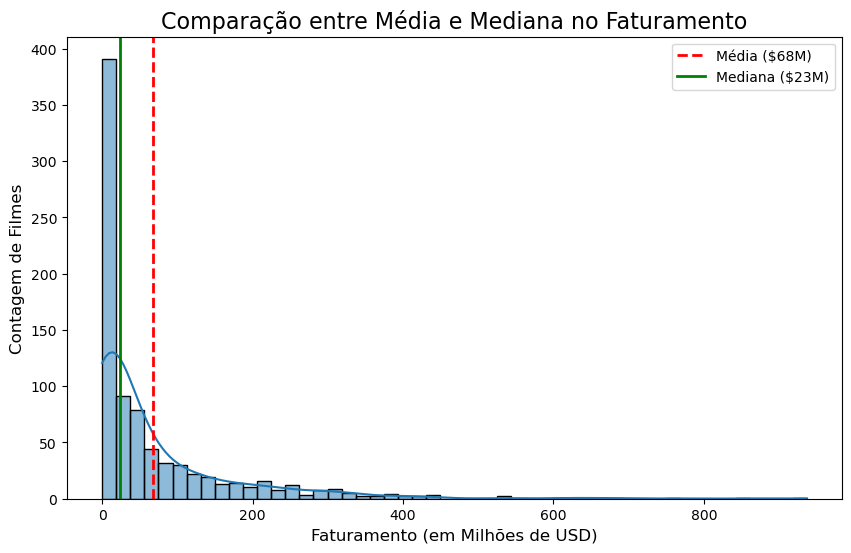

In [12]:
# Justificativa da Escolha entre Média e Mediana (com dados reais)

# Calculando a média e a mediana do faturamento a partir do df com dados originais
media_faturamento = df_original_gross['Gross_Millions'].mean()
mediana_faturamento = df_original_gross['Gross_Millions'].median()

print(f"Média do Faturamento (Dados Reais): ${media_faturamento:,.2f} Milhões")
print(f"Mediana do Faturamento (Dados Reais): ${mediana_faturamento:,.2f} Milhões")

# Criando a visualização para provar o ponto
plt.figure(figsize=(10, 6))
sns.histplot(data=df_original_gross, x='Gross_Millions', kde=True, bins=50)

# Adicionando as linhas da média e mediana ao gráfico
plt.axvline(x=media_faturamento, color='red', linestyle='--', linewidth=2, label=f'Média (${media_faturamento:,.0f}M)')
plt.axvline(x=mediana_faturamento, color='green', linestyle='-', linewidth=2, label=f'Mediana (${mediana_faturamento:,.0f}M)')

plt.title('Comparação entre Média e Mediana no Faturamento', fontsize=16)
plt.xlabel('Faturamento (em Milhões de USD)', fontsize=12)
plt.ylabel('Contagem de Filmes', fontsize=12)
plt.legend()
plt.show()

###**Análises Univariadas**

####**Numéricas**

--- Estatísticas Descritivas para 'Gross' (Dados Reais) ---
count    830.000000
mean      68.082574
std      109.807553
min        0.001305
25%        3.245338
50%       23.457439
75%       80.876340
max      936.662225
Name: Gross_Millions, dtype: float64




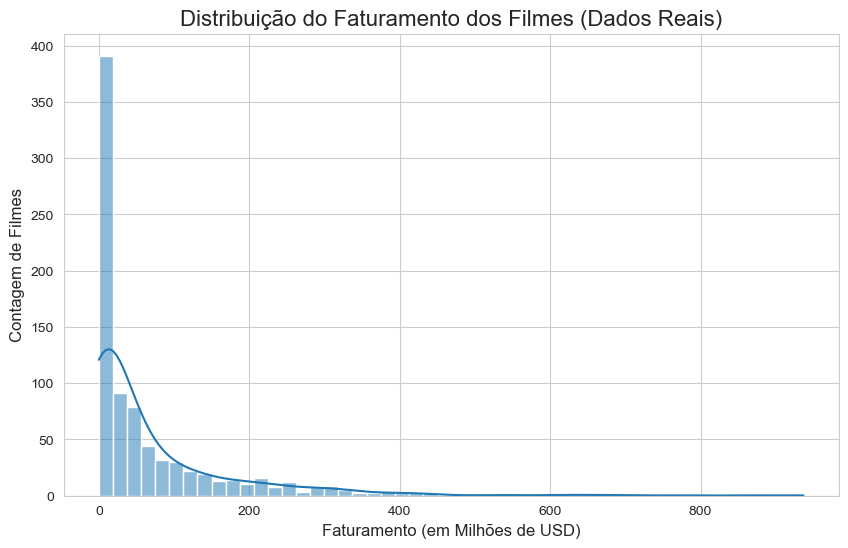

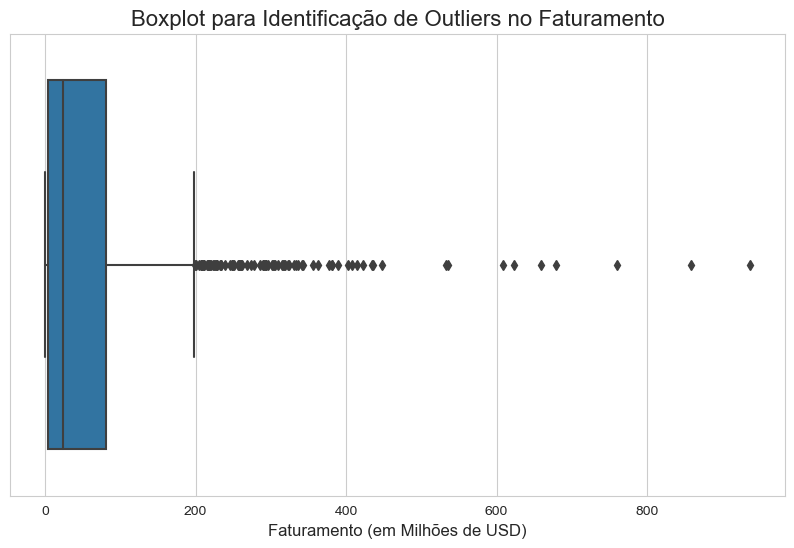

In [13]:
# Estatísticas descritivas do faturamento, variável target 'Gross', com dados originais
print("--- Estatísticas Descritivas para 'Gross' (Dados Reais) ---")
descritivas_faturamento = df_original_gross['Gross_Millions'].describe()
print(descritivas_faturamento)
print('\n')

# Visualizando a distribuição do faturamento
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.histplot(df_original_gross['Gross_Millions'], kde=True, bins=50)
plt.title('Distribuição do Faturamento dos Filmes (Dados Reais)', fontsize=16)
plt.xlabel('Faturamento (em Milhões de USD)', fontsize=12)
plt.ylabel('Contagem de Filmes', fontsize=12)
plt.show()
print('\n')

# Visualizando outliers
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
sns.boxplot(x=df_original_gross['Gross_Millions'])
plt.title('Boxplot para Identificação de Outliers no Faturamento', fontsize=16)
plt.xlabel('Faturamento (em Milhões de USD)', fontsize=12)
plt.show()

--- Estatísticas Descritivas para 'IMDB_Rating' ---
count    999.000000
mean       7.947948
std        0.272290
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.200000
Name: IMDB_Rating, dtype: float64




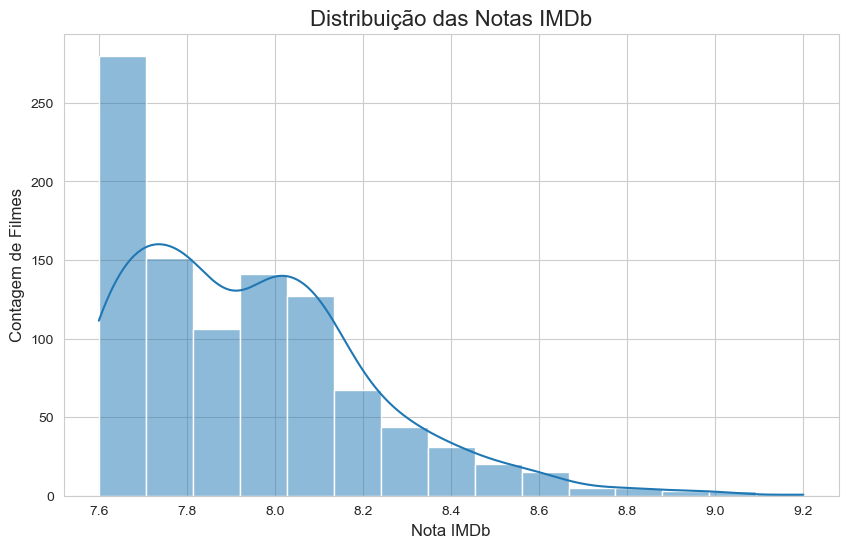

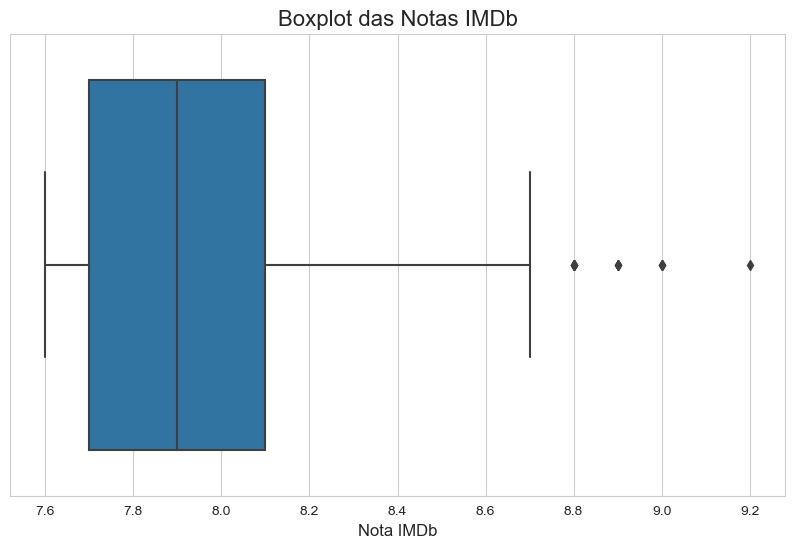

In [14]:
# Estatísticas descritivas para nota do imdb - 'IMDB_Rating', com o df_imputed, ja que esta variavel não tinha valores ausentes
print("--- Estatísticas Descritivas para 'IMDB_Rating' ---")
descritivas_rating = df_imputed['IMDB_Rating'].describe()
print(descritivas_rating)
print("\n")

# Visualizando a distribuição das notas imdb
plt.figure(figsize=(10, 6))
sns.histplot(df_imputed['IMDB_Rating'], kde=True, bins=15)
plt.title('Distribuição das Notas IMDb', fontsize=16)
plt.xlabel('Nota IMDb', fontsize=12)
plt.ylabel('Contagem de Filmes', fontsize=12)
plt.show()
print("\n")

# Visualizando outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_imputed['IMDB_Rating'])
plt.title('Boxplot das Notas IMDb', fontsize=16)
plt.xlabel('Nota IMDb', fontsize=12)
plt.show()

--- Estatísticas Descritivas para 'No_of_Votes' (em milhares) ---
count     999.000000
mean      271.621422
std       320.912621
min        25.088000
25%        55.471500
50%       138.356000
75%       373.167500
max      2303.232000
Name: Votes_in_Thousands, dtype: float64




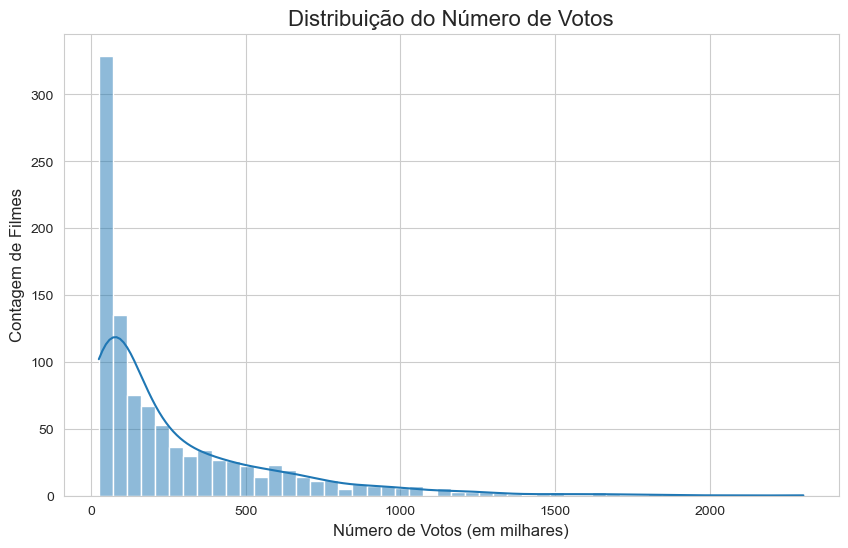

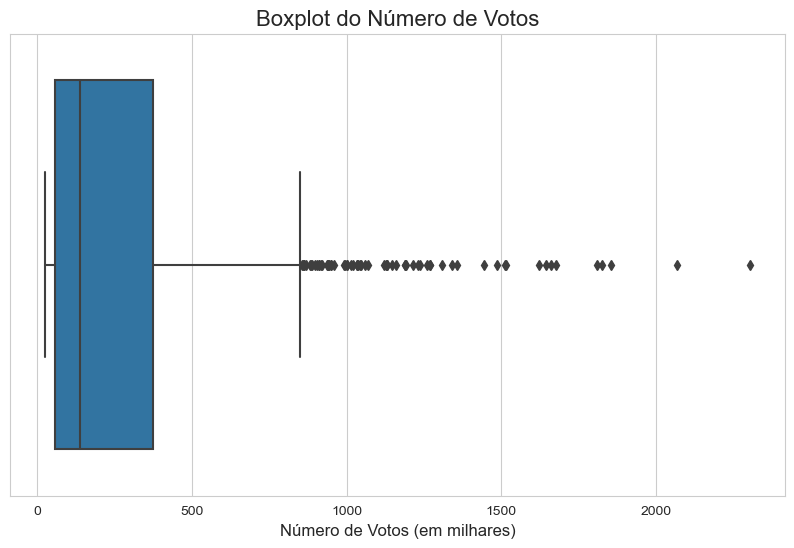

In [15]:
# Estatísticas descritivas para 'No_of_Votes', com o df_imputed, ja que esta variavel não tinha valores ausentes
print("--- Estatísticas Descritivas para 'No_of_Votes' (em milhares) ---")
descritivas_votes = df_imputed['Votes_in_Thousands'].describe()
print(descritivas_votes)
print("\n")

# Visualizando a distribuição do número de votos
plt.figure(figsize=(10, 6))
sns.histplot(df_imputed['Votes_in_Thousands'], kde=True, bins=50)
plt.title('Distribuição do Número de Votos', fontsize=16)
plt.xlabel('Número de Votos (em milhares)', fontsize=12)
plt.ylabel('Contagem de Filmes', fontsize=12)
plt.show()
print("\n")

# Visualizando outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_imputed['Votes_in_Thousands'])
plt.title('Boxplot do Número de Votos', fontsize=16)
plt.xlabel('Número de Votos (em milhares)', fontsize=12)
plt.show()

--- Estatísticas Descritivas para 'Meta_score' (após tratamento) ---
count    999.000000
mean      78.131131
std       11.373766
min       28.000000
25%       72.000000
50%       79.000000
75%       85.500000
max      100.000000
Name: Meta_score, dtype: float64




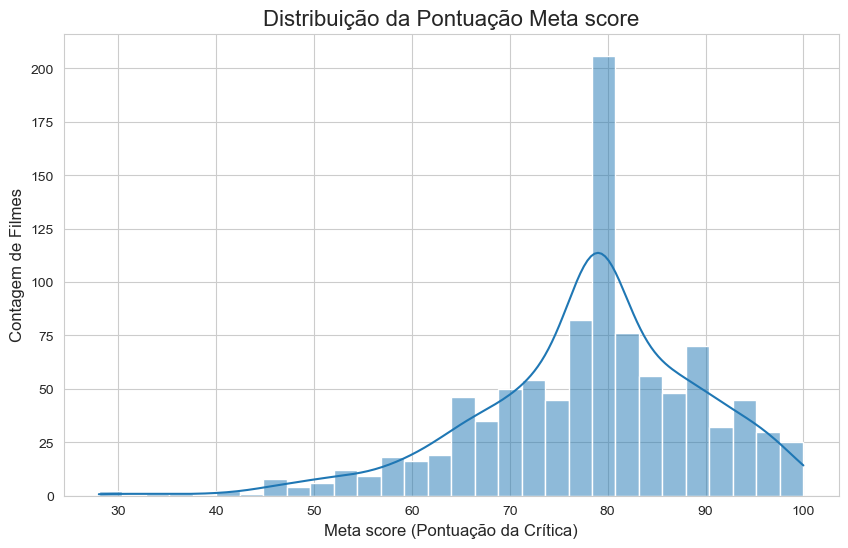

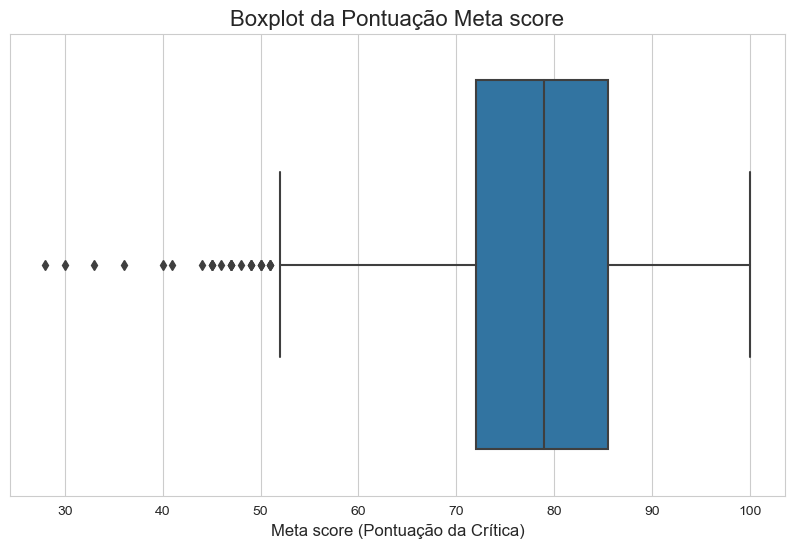

In [16]:
# Estatísticas descritivas para 'Meta_score'
print("--- Estatísticas Descritivas para 'Meta_score' (após tratamento) ---")
descritivas_metascore = df_imputed['Meta_score'].describe()
print(descritivas_metascore)
print("\n")

# Visualizando a distribuição da pontuação Meta score
plt.figure(figsize=(10, 6))
sns.histplot(df_imputed['Meta_score'], kde=True, bins=30)
plt.title('Distribuição da Pontuação Meta score', fontsize=16)
plt.xlabel('Meta score (Pontuação da Crítica)', fontsize=12)
plt.ylabel('Contagem de Filmes', fontsize=12)
plt.show()
print("\n")

# Visualizando outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_imputed['Meta_score'])
plt.title('Boxplot da Pontuação Meta score', fontsize=16)
plt.xlabel('Meta score (Pontuação da Crítica)', fontsize=12)
plt.show()

--- Estatísticas Descritivas para 'Runtime' (em minutos) ---
count    999.000000
mean     122.871872
std       28.101227
min       45.000000
25%      103.000000
50%      119.000000
75%      137.000000
max      321.000000
Name: Runtime, dtype: float64




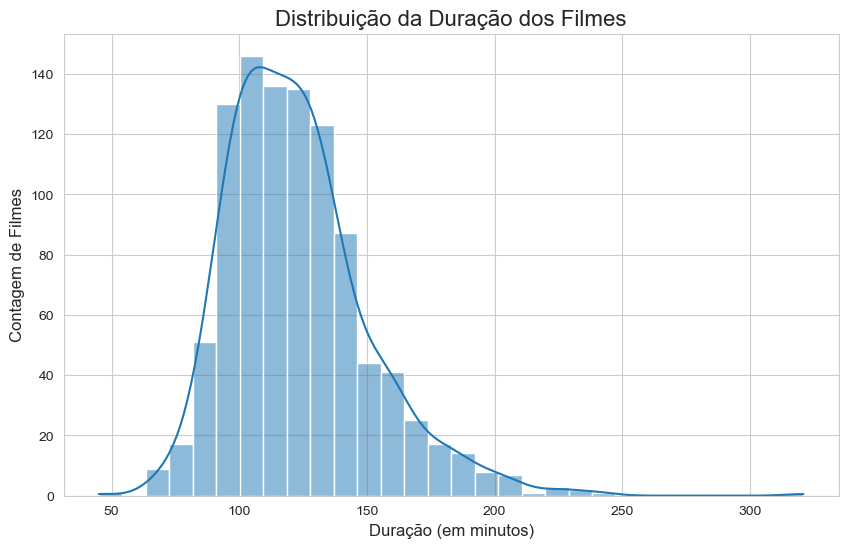

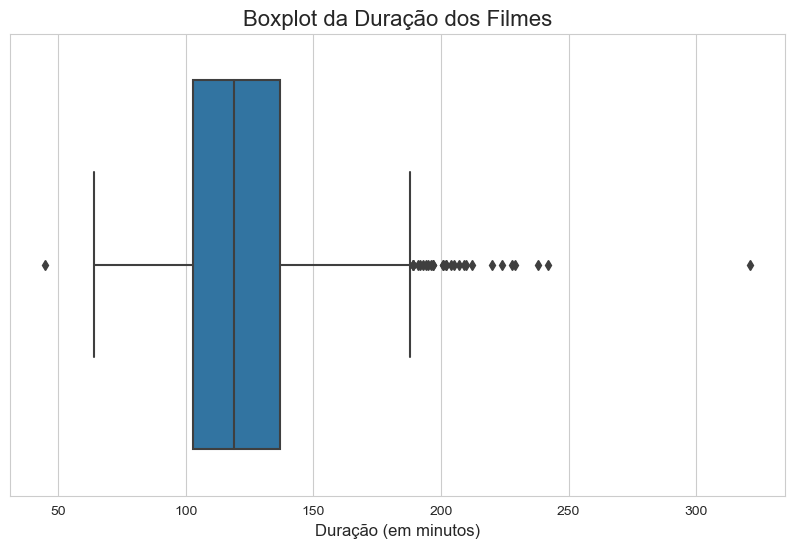

In [17]:
# Estatísticas Descritivas para 'Runtime'
print("--- Estatísticas Descritivas para 'Runtime' (em minutos) ---")
descritivas_runtime = df_imputed['Runtime'].describe()
print(descritivas_runtime)
print("\n")

# Visualizando a distribuição da duração/tempo dos filmes
plt.figure(figsize=(10, 6))
sns.histplot(df_imputed['Runtime'], kde=True, bins=30)
plt.title('Distribuição da Duração dos Filmes', fontsize=16)
plt.xlabel('Duração (em minutos)', fontsize=12)
plt.ylabel('Contagem de Filmes', fontsize=12)
plt.show()
print("\n")

# Visualizando outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_imputed['Runtime'])
plt.title('Boxplot da Duração dos Filmes', fontsize=16)
plt.xlabel('Duração (em minutos)', fontsize=12)
plt.show()

####**Categóricas**

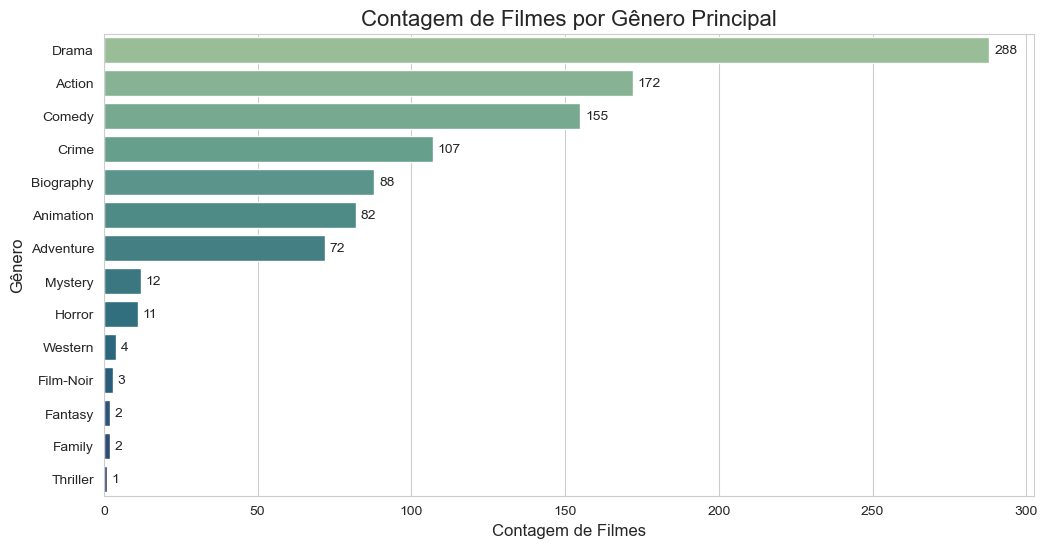

In [18]:
# Análise da frequência dos gêneros dos filmes
# Como um filme pode ter múltiplos gêneros, neste código,vou analisar o gênero principal, que é o primeiro genero da lista de cada filme
df_imputed['Main_Genre'] = df_imputed['Genre'].apply(lambda x: x.split(',')[0])

plt.figure(figsize=(12, 6))
ax = sns.countplot(y=df_imputed['Main_Genre'], order=df_imputed['Main_Genre'].value_counts().index, palette='crest')

plt.title('Contagem de Filmes por Gênero Principal', fontsize=16)
plt.xlabel('Contagem de Filmes', fontsize=12)
plt.ylabel('Gênero', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Rotulagem das barras
for patch in ax.patches:
    width = patch.get_width()
    y = patch.get_y()
    height = patch.get_height()
    ax.text(width + 1.5, y + height/2, f'{int(width)}', va='center', fontsize=10)

plt.show()

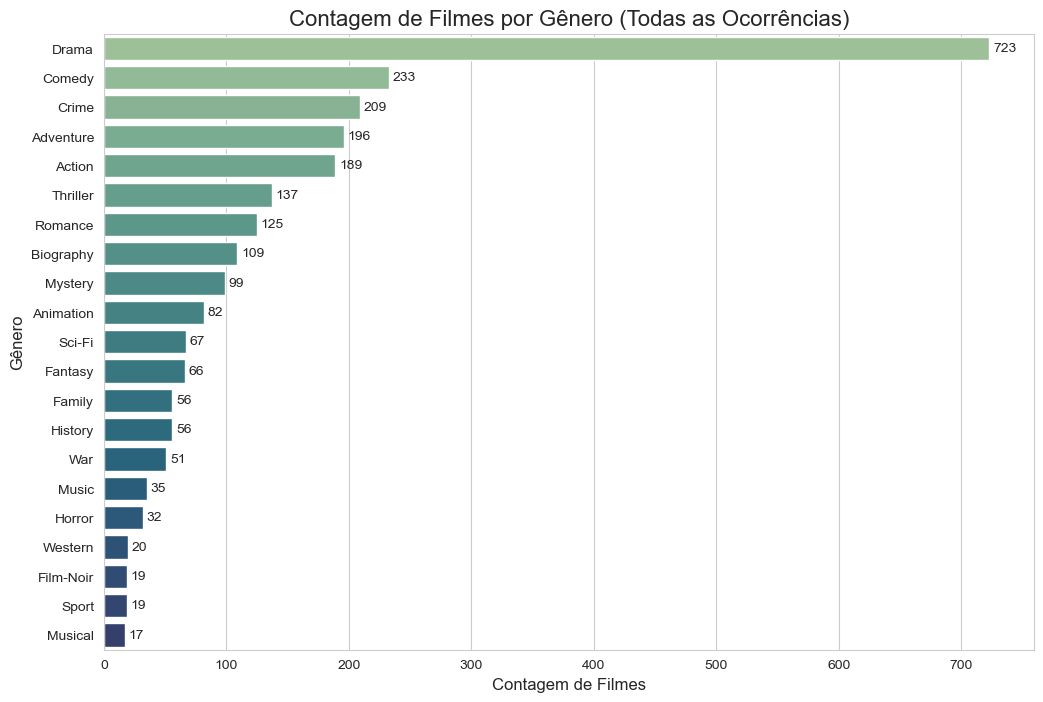

In [19]:
# Análise da frequência de TODOS os gêneros
# Nesta parte, estou contabilizando todos os gêneros que aparecem em cada filme, por isso a diferença na soma das frequências

# Criando uma cópia do nosso DataFrame principal para não alterá-lo
df_all_genres = df_imputed.copy()
df_all_genres['Genre_List'] = df_all_genres['Genre'].apply(lambda x: [genre.strip() for genre in x.split(',')])

# O .explode() cria uma nova linha para cada gênero na lista
df_all_genres = df_all_genres.explode('Genre_List')

plt.figure(figsize=(12, 8))
ax = sns.countplot(y=df_all_genres['Genre_List'], order=df_all_genres['Genre_List'].value_counts().index, palette='crest')

plt.title('Contagem de Filmes por Gênero (Todas as Ocorrências)', fontsize=16)
plt.xlabel('Contagem de Filmes', fontsize=12)
plt.ylabel('Gênero', fontsize=12)

# Rotulagem das barras
for patch in ax.patches:
    width = patch.get_width()
    y = patch.get_y()
    height = patch.get_height()
    ax.text(width + 3, y + height/2, f'{int(width)}', va='center')

plt.show()

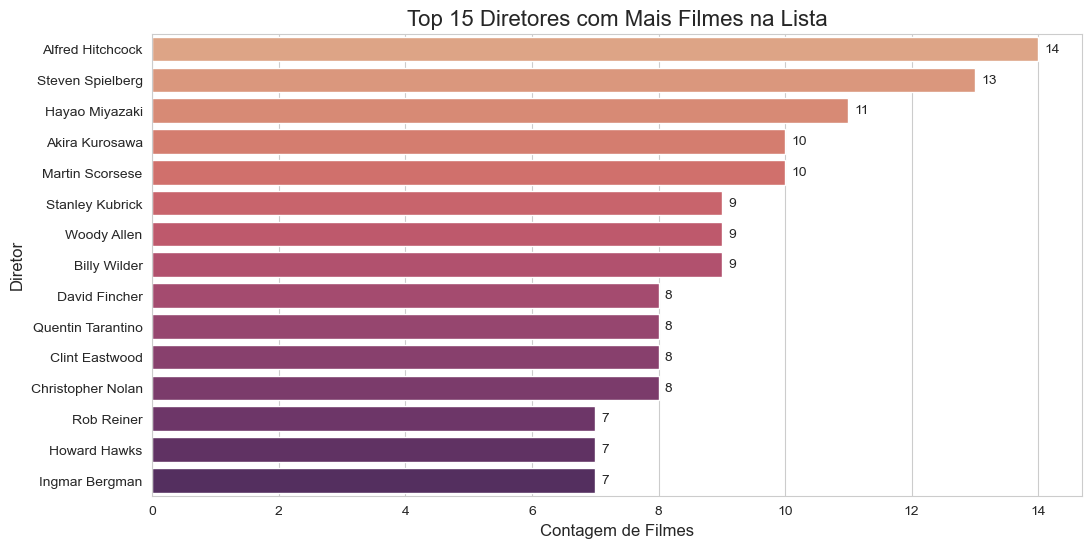

In [20]:
# Análise da frequência de diretores, os TOP 15
top_directors = df_imputed['Director'].value_counts().head(15)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_directors.values, y=top_directors.index, palette='flare')

plt.title('Top 15 Diretores com Mais Filmes na Lista', fontsize=16)
plt.xlabel('Contagem de Filmes', fontsize=12)
plt.ylabel('Diretor', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Rotulagem das barras
for patch in ax.patches:
    width = patch.get_width()
    y = patch.get_y()
    height = patch.get_height()
    ax.text(width + 0.1, y + height/2, f'{int(width)}', va='center', fontsize=10)

plt.show()

###**Análises Bivariadas**

####**Matriz de Correlação**

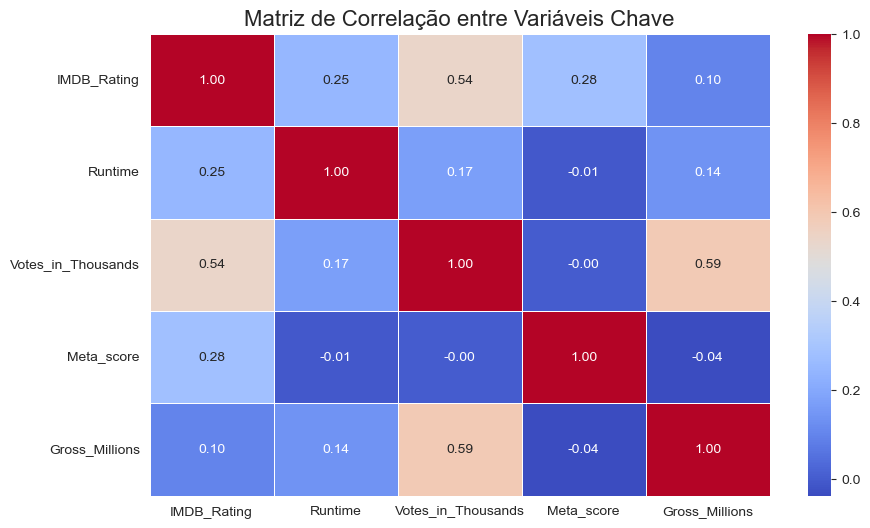


Correlação com a variável target 'Gross_Millions':
Gross_Millions        1.000000
Votes_in_Thousands    0.589527
Runtime               0.140002
IMDB_Rating           0.099393
Meta_score           -0.037282
Name: Gross_Millions, dtype: float64


In [21]:
# Matriz de Correlação
# Selecionando as cols numéricas de interesse
numeric_cols = [
    'IMDB_Rating',
    'Runtime',
    'Votes_in_Thousands',
    'Meta_score',
    'Gross_Millions'
]

# Criando a matriz de correlação
corr_matrix = df_original_gross[numeric_cols].corr()

# Plotando o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlação entre Variáveis Chave', fontsize=16)
plt.show()

# Correlação com a variável target
print("\nCorrelação com a variável target 'Gross_Millions':")
print(corr_matrix['Gross_Millions'].sort_values(ascending=False))

####**Gráfico de Dispersão**

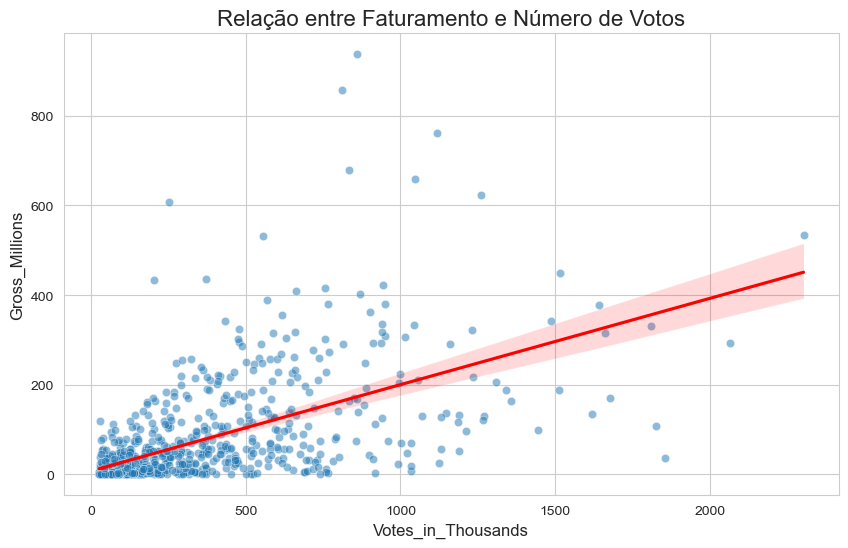

In [22]:
# Scatteplot de faturamento vs. número de votos
plt.figure(figsize=(10, 6))

# Criando o gráfico de dispersão
sns.scatterplot(data=df_original_gross, x='Votes_in_Thousands', y='Gross_Millions', alpha=0.5)

plt.title('Relação entre Faturamento e Número de Votos', fontsize=16)
plt.xlabel('Número de Votos (em milhares)', fontsize=12)
plt.ylabel('Faturamento (em Milhões de USD)', fontsize=12)

# Adicionando uma linha de regressão para visualizar a tendência
sns.regplot(data=df_original_gross, x='Votes_in_Thousands', y='Gross_Millions', scatter=False, color='red')
plt.show()

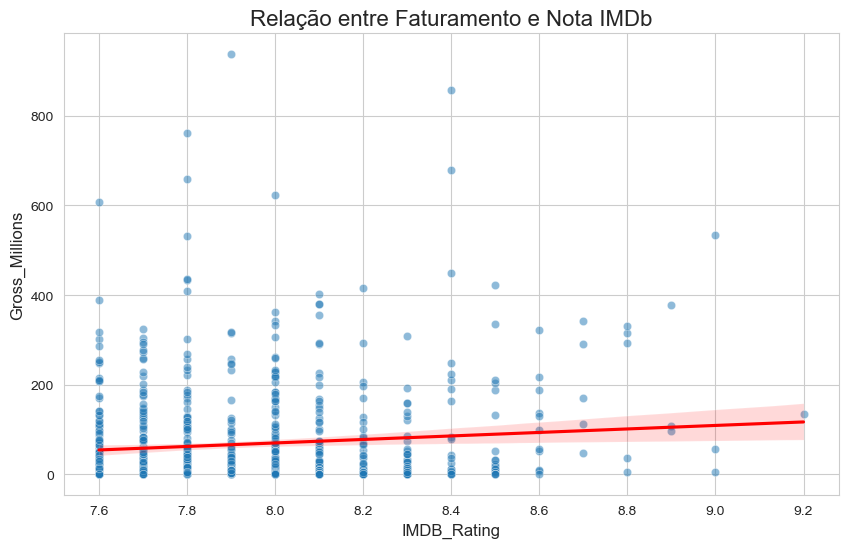

In [23]:
# Scatterplot de faturamento vs. nota IMDB
plt.figure(figsize=(10, 6))

# Criando o gráfico de dispersão
sns.scatterplot(data=df_original_gross, x='IMDB_Rating', y='Gross_Millions', alpha=0.5)

plt.title('Relação entre Faturamento e Nota IMDb', fontsize=16)
plt.xlabel('Nota IMDb', fontsize=12)
plt.ylabel('Faturamento (em Milhões de USD)', fontsize=12)

# Adicionando uma linha de regressão para visualizar a tendência
sns.regplot(data=df_original_gross, x='IMDB_Rating', y='Gross_Millions', scatter=False, color='red')
plt.show()

####**Gráfico de barra**

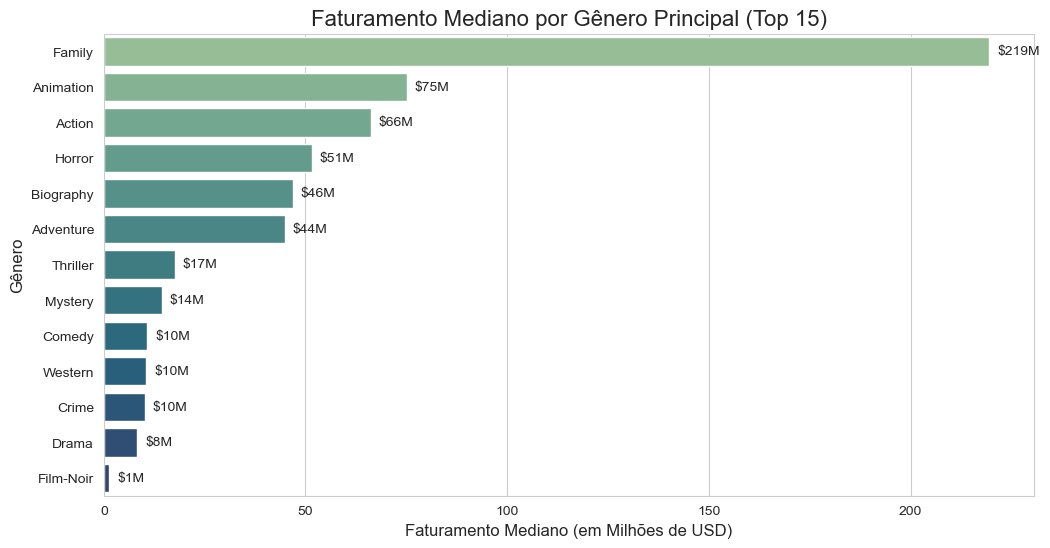

In [24]:
# Faturamento vs. gênero - com os dados originais de Gross
# Criando a coluna 'Main_Genre' no df original
df_original_gross['Main_Genre'] = df_original_gross['Genre'].apply(lambda x: x.split(',')[0])

# Calculei o faturamento mediano para cada gênero e peguei os 15 maiores
# Utilizei mediana para não ser afetada por valores extremos
genre_gross_median = df_original_gross.groupby('Main_Genre')['Gross_Millions'].median().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))

# Criando o gráfico de barras
ax = sns.barplot(x=genre_gross_median.values, y=genre_gross_median.index, palette='crest')

plt.title('Faturamento Mediano por Gênero Principal (Top 15)', fontsize=16)
plt.xlabel('Faturamento Mediano (em Milhões de USD)', fontsize=12)
plt.ylabel('Gênero', fontsize=12)

# Rotulagem dos dados
for patch in ax.patches:
    width = patch.get_width()
    y = patch.get_y()
    height = patch.get_height()
    ax.text(width + 2, y + height/2, f'${int(width)}M', va='center') # M = milhões

plt.show()

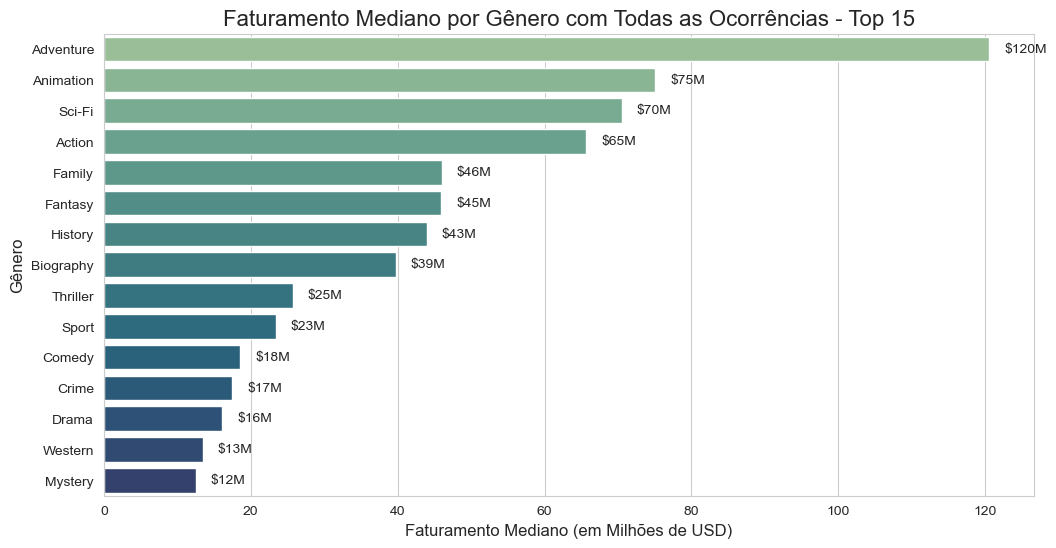

In [25]:
# Faturamento Mediano por Gênero
# Utilizando TODAS as ocorrências de gênero e APENAS dados de faturamento reais

# Parti do df_original_gross para garantir a precisão da análise e criei uma cópia que será "explodida"
df_genres_exploded = df_original_gross.copy()

# Criando a lista de gêneros e usando .explode()
df_genres_exploded['Genre_List'] = df_genres_exploded['Genre'].apply(lambda x: [genre.strip() for genre in x.split(',')])
df_genres_exploded = df_genres_exploded.explode('Genre_List')

# Calculando a mediana
median_gross_by_genre = df_genres_exploded.groupby('Genre_List')['Gross_Millions'].median().sort_values(ascending=False).head(15)

# Plotando o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=median_gross_by_genre.values, y=median_gross_by_genre.index, palette='crest')

plt.title('Faturamento Mediano por Gênero com Todas as Ocorrências - Top 15', fontsize=16)
plt.xlabel('Faturamento Mediano (em Milhões de USD)', fontsize=12)
plt.ylabel('Gênero', fontsize=12)

# Rotulagem dos barras
for patch in ax.patches:
    width = patch.get_width()
    y = patch.get_y()
    height = patch.get_height()
    ax.text(width + 2, y + height/2, f'${int(width)}M', va='center')

plt.show()

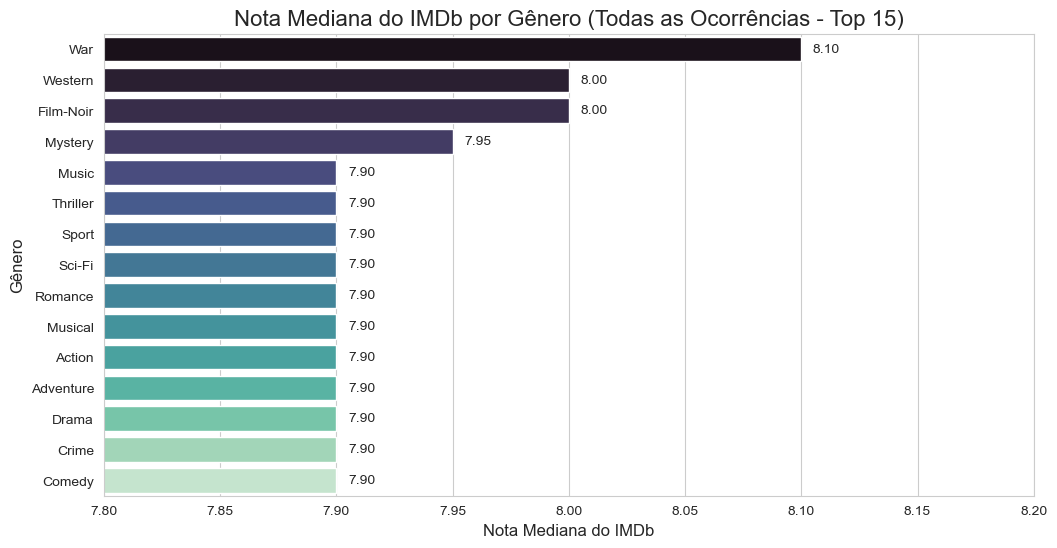

In [26]:
# Nota Mediana do IMDb por Gênero com todas as ocorrencias, para tornar a analise mais robusta, do que só utilizar os generos principais

# Calculando a nota mediana para cada gênero e pegando os top 15
median_rating_by_genre = df_genres_exploded.groupby('Genre_List')['IMDB_Rating'].median().sort_values(ascending=False).head(15)

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=median_rating_by_genre.values, y=median_rating_by_genre.index, palette='mako')

plt.title('Nota Mediana do IMDb por Gênero (Todas as Ocorrências - Top 15)', fontsize=16)
plt.xlabel('Nota Mediana do IMDb', fontsize=12)
plt.ylabel('Gênero', fontsize=12)

# Rotulagem dos dados
plt.xlim(7.8, 8.2)

for patch in ax.patches:
    width = patch.get_width()
    y = patch.get_y()
    height = patch.get_height()
    ax.text(width + 0.005, y + height/2, f'{width:.2f}', va='center')

plt.show()

###**Análises Multivariadas**

In [27]:
# Análise multivariada para comparação interativa dos top 3 gêneros
# Definição dos 3 gêneros para comparação, baseados na análise de faturamento
top_3_genres = ['Animation', 'Adventure', 'Sci-Fi']

# Usei o df_genres_exploded (criado a partir do df_original_gross) que contém
# todas as ocorrências de gênero e apenas os dados de faturamento reais
# Filtrei para manter apenas os 3 gêneros de interesse
df_top_genres = df_genres_exploded[df_genres_exploded['Genre_List'].isin(top_3_genres)]

# Calculando as medianas para cada métrica
median_gross = df_top_genres.groupby('Genre_List')['Gross_Millions'].median().reindex(top_3_genres)
median_rating = df_top_genres.groupby('Genre_List')['IMDB_Rating'].median().reindex(top_3_genres)
median_votes = df_top_genres.groupby('Genre_List')['Votes_in_Thousands'].median().reindex(top_3_genres)

# Criando a figura com 3 subplots
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Faturamento Mediano", "Nota Mediana do IMDb", "Popularidade Mediana (Votos)")
)

# Gráfico 1: Faturamento Mediano
fig.add_trace(go.Bar(
    x=median_gross.index,
    y=median_gross.values,
    text=median_gross.values,
    texttemplate='$%{text:.0f}M', # para formatação do texto aparecer como $133M
    textposition='outside',
    marker_color='#636EFA' # Azul
), row=1, col=1)

# Gráfico 2: Nota Mediana do IMDb
fig.add_trace(go.Bar(
    x=median_rating.index,
    y=median_rating.values,
    text=median_rating.values,
    texttemplate='%{text:.2f}',
    textposition='outside',
    marker_color='#00CC96' # Verde
), row=1, col=2)

# Gráfico 3: Popularidade Mediana
fig.add_trace(go.Bar(
    x=median_votes.index,
    y=median_votes.values,
    text=median_votes.values,
    texttemplate='%{text:.0f} mil',
    textposition='outside',
    marker_color='#EF553B' # Laranja
), row=1, col=3)

# Atualizando e limpando o layout
fig.update_layout(
    title_text='Análise Comparativa dos 3 Gêneros Mais Rentáveis',
    showlegend=False,
    height=500,
    yaxis_title="Milhões de USD",
    yaxis2_title="Nota (de 1 a 10)",
    yaxis3_title="Votos (em milhares)"
)

# Ajustando o range do eixo Y do gráfico de notas para destacar as diferenças
fig.update_yaxes(range=[7.8, 8.2], row=1, col=2)

fig.show()

**Visualização Estática para o GitHub:**
![Análise Comparativa dos 3 Gêneros Mais Rentáveis](../images/generos_mais_rentaveis.png)

In [28]:
# Análise multivariada para quadrante de sucesso dos top 15 diretores

# Identificando os 15 diretores mais frequentes para focar a análise
top_15_directors = df_imputed['Director'].value_counts().nlargest(15).index

# Filtrando o df principal para conter apenas os filmes desses diretores
df_top_directors = df_imputed[df_imputed['Director'].isin(top_15_directors)]

# Agrupando por diretor e calculando a MÉDIA da nota e dos votos
director_analysis = df_top_directors.groupby('Director').agg(
    Avg_IMDB_Rating=('IMDB_Rating', 'mean'),
    Avg_No_of_Votes=('No_of_Votes', 'mean'),
    Movie_Count=('Series_Title', 'count') # Contagem dos filmes para usar no tamanho do ponto
).reset_index()


# Criando o gráfico interativo com Plotly, com legenda por cor
fig = px.scatter(
    director_analysis,
    x='Avg_IMDB_Rating',
    y='Avg_No_of_Votes',
    size='Movie_Count',
    color='Director',
    hover_name='Director',
    hover_data={
        'Avg_IMDB_Rating': ':.2f',
        'Avg_No_of_Votes': ':,.0f',
        'Movie_Count': True,
        'Director': False
    },
    size_max=40,
    title='Análise de Diretores: Aclamação (Nota Média) vs. Popularidade (Votos Médios)'
)

# Melhorando o layout para clareza
fig.update_layout(
    xaxis_title='Nota Média do IMDb (Aclamação)',
    yaxis_title='Média de Votos (Popularidade)',
    legend_title='Diretores',
    height=700
)

fig.show()

**Visualização Estática para o GitHub:**
![Gráfico de Análise de Diretores](../images/diretores_mais_aclamados.png)

**Insights da Análise de Diretores**

**Aclamação vs. Popularidade**

Este gráfico nos ajuda a entender os diferentes perfis de sucesso entre os diretores mais frequentes no dataset, comparando a Aclamação (nota média do público) com a Popularidade (média de votos) de seus filmes. A análise revela alguns insights estratégicos para o estúdio:

* **O Superastro (Alto em Tudo):**

  Christopher Nolan se destaca em uma categoria própria. Ele está posicionado no canto superior direito do gráfico, indicando que seus filmes, na média, alcançam tanto notas altíssimas quanto um nível de popularidade (engajamento) massivo. Para um estúdio, um diretor com este perfil é a aposta mais segura para um blockbuster que seja um sucesso de crítica e de público.

* **Os Mestres Consistentes:**

  Diretores como Quentin Tarantino, Stanley Kubrick e Martin Scorsese se posicionam fortemente no eixo da Aclamação (notas médias muito altas). Embora extremamente populares, eles representam um perfil de diretor focado na entrega de obras de altíssima qualidade, que constroem um legado e geram prestígio para o estúdio.

* **Os Veteranos de Sucesso:**

  Lendas como Alfred Hitchcock e Steven Spielberg aparecem com um equilíbrio notável. Eles possuem uma filmografia extensa (representado pelo tamanho dos pontos) e conseguem manter uma média de qualidade e popularidade muito elevadas, provando seu apelo duradouro através das décadas.

**Conclusão para o Estúdio:**

Esta análise mostra que não existe um único caminho para o sucesso. A escolha de um diretor define a estratégia do filme. Para um retorno financeiro massivo combinado com aclamação, diretores com o perfil de Christopher Nolan são ideais. Para um foco em prestígio, prêmios e um público fiel, diretores como Quentin Tarantino ou Martin Scorsese são a aposta certa.

##**Questão 2: Respostas às Perguntas de Negócio**

###**a. Qual filme você recomendaria para uma pessoa que você não conhece?**

Como não conheço os gostos da pessoa, não posso recomendar um filme de um gênero de nicho. Preciso encontrar um filme que seja excelente (de acordo com a opinião popular).

* **IMDB_Rating:** mede a qualidade percebida pelo público.

* **No_of_Votes:** mede a popularidade e o alcance do filme.

A melhor recomendação seria a de um filme que está no topo em ambas as métricas. Um filme com uma nota altíssima e um número gigantesco de votos é, por definição, um filme que agradou a uma grande quantidade de pessoas e de gostos diversos.

**A recomendação é o filme: The Godfather (O Poderoso Chefão)**

In [29]:
# Recomendação de filme para pessoa desconhecida

# Garante que a coluna 'Main_Genre' exista no nosso df principal
if 'Main_Genre' not in df_imputed.columns:
    df_imputed['Main_Genre'] = df_imputed['Genre'].apply(lambda x: x.split(',')[0])

# Defini critérios de excelência e popularidade: nota IMDb >= 8.8 e votos > 1.5 milhão
# A filtragem é feita no df_imputed
high_quality_popular_films = df_imputed[
    (df_imputed['IMDB_Rating'] >= 8.8) &
    (df_imputed['No_of_Votes'] > 1500000)
].copy()

# Ordenei pela nota e depois pelo número de votos
recommended_films = high_quality_popular_films.sort_values(
    by=['IMDB_Rating', 'No_of_Votes'],
    ascending=False
)

# Selecionei e renomeei as colunas para português
presentable_table = recommended_films[['Series_Title', 'IMDB_Rating', 'No_of_Votes', 'Main_Genre']].rename(columns={
    'Series_Title': 'Título do Filme',
    'IMDB_Rating': 'Nota IMDb',
    'No_of_Votes': 'Número de Votos',
    'Main_Genre': 'Gênero Principal'
})
presentable_table = presentable_table.reset_index(drop=True)

# Apliquei o estilo de formatação
styled_table = presentable_table.style.format({
    'Número de Votos': '{:,.0f}'
}).set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

# Resultado da recomendação
display(styled_table)

,Título do Filme,Nota IMDb,Número de Votos,Gênero Principal
0,The Godfather,9.200000,"1,620,367",Crime
1,The Dark Knight,9.000000,"2,303,232",Action
2,Pulp Fiction,8.900000,"1,826,188",Crime
3,The Lord of the Rings: The Return of the King,8.900000,"1,642,758",Action
4,Inception,8.800000,"2,067,042",Action
5,Fight Club,8.800000,"1,854,740",Drama
6,Forrest Gump,8.800000,"1,809,221",Drama
7,The Lord of the Rings: The Fellowship of the Ring,8.800000,"1,661,481",Action


###**b. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**

**Fatores-Chave para um Alto Faturamento**

Com base na Análise Exploratória de Dados (EDA), cheguei à conclusão de que três fatores principais se destacam quando o assunto é prever um faturamento alto:

* **Popularidade ('No_of_Votes'):** este é, sem dúvidas, o fator mais pesado.

  Os dados mostraram que a correlação aqui é a mais alta de todas (0.59). Na prática, um filme precisa ser muito comentado e popular para faturar alto, sendo quase um pré-requisito para entrar no clube dos "blockbusters".

* **Qualidade (Nota IMDb):** em seguida, vem a qualidade percebida pelo público.

  Embora a correlação seja mais moderada, os gráficos mostram que os filmes de maior faturamento quase sempre têm notas altas (acima de 8.0). Uma nota boa não garante o sucesso, mas uma nota ruim praticamente elimina a chance de um faturamento gigantesco.

* **Escolha Estratégica do Gênero ('Genre'):** por fim, a escolha do gênero é crucial e exigiu uma análise aprofundada.

  Uma análise inicial, considerando apenas o primeiro gênero listado, mostrou-se enganosa. O gênero 'Family', por exemplo, apareceu no topo, mas a média era baseada em uma amostra de apenas dois filmes, o que não é estatisticamente seguro.

  Para corrigir isso, a análise final considerou todas as ocorrências de cada gênero. Este método mais robusto revelou que os gêneros que, na média, trazem o maior retorno financeiro são Aventura (120 milhões), seguido por Animação (75 milhões) e Ficção Científica (70 milhões).

**Resumo**

A receita para uma alta expectativa de faturamento é um filme de um gênero comercialmente forte (como Aventura ou Animação), que consiga gerar muito engajamento (alto número de votos) e que seja percebido como um filme de alta qualidade (nota IMDb alta).


###**c. Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**

--- Gerando Nuvem de Palavras para o Gênero: Action ---


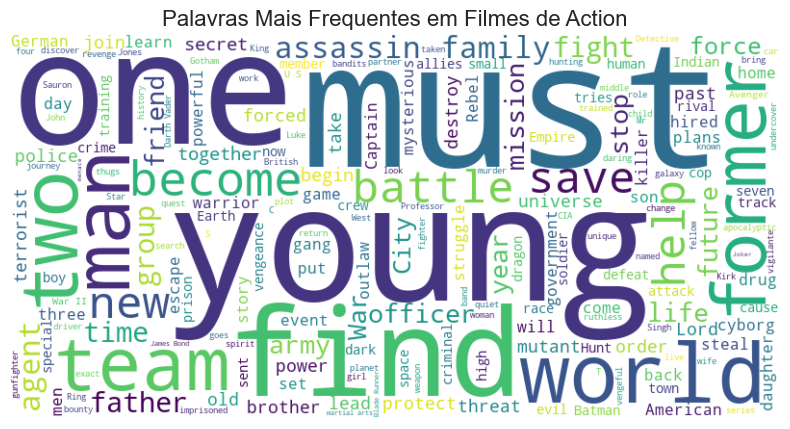



--- Gerando Nuvem de Palavras para o Gênero: Sci-Fi ---


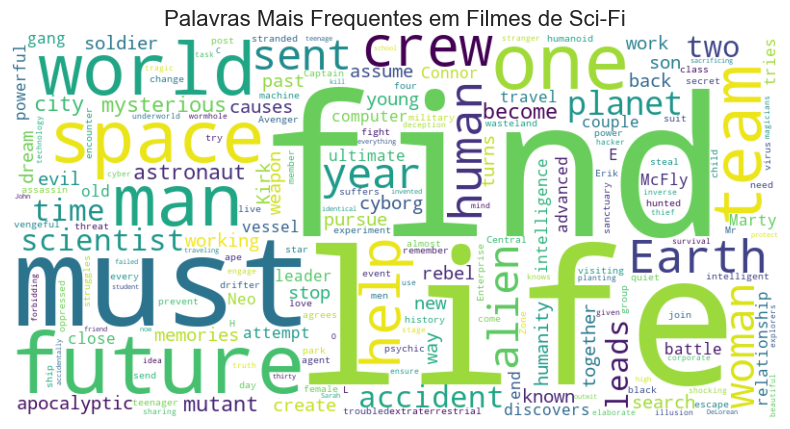



--- Gerando Nuvem de Palavras para o Gênero: Horror ---


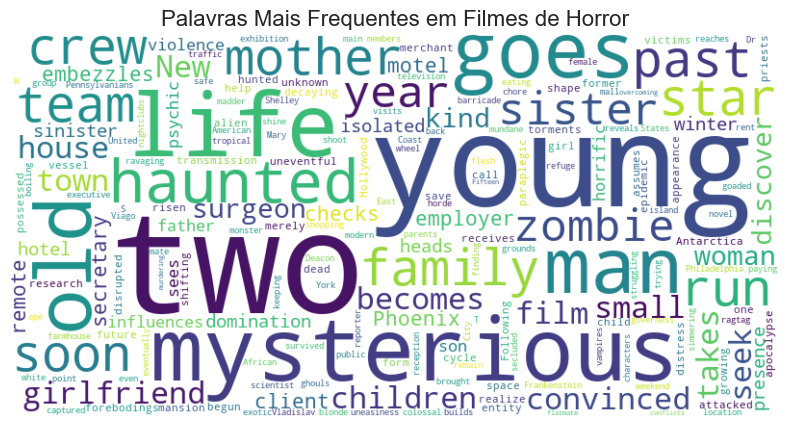

In [30]:
# Utilizei o df_genres_exploded que já tem todos os gêneros separados

# Função para gerar e mostrar a nuvem de palavras
def gerar_nuvem_palavras(genero, dataframe):
    print(f"--- Gerando Nuvem de Palavras para o Gênero: {genero} ---")

    # Filtrando o df para o gênero específico
    texto_genero = dataframe[dataframe['Genre_List'] == genero]['Overview']

    # Juntando todas as sinopses em um único texto
    texto_completo = ' '.join(texto_genero)

    # Criando a nuvem de palavras
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        stopwords=None
    ).generate(texto_completo)

    # Mostrando as imagens
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Palavras Mais Frequentes em Filmes de {genero}', fontsize=16)
    plt.show()

# Gerando a nuvem para os gêneros de interesse
gerar_nuvem_palavras('Action', df_genres_exploded)
print("\n")
gerar_nuvem_palavras('Sci-Fi', df_genres_exploded)
print("\n")
gerar_nuvem_palavras('Horror', df_genres_exploded)

**Análise da Coluna Overview e Inferência de Gênero**

Sim, a análise da coluna **Overview** mostra que é possível inferir o gênero de um filme a partir de sua sinopse. As Nuvens de Palavras para gêneros distintos (Action, Sci-Fi e Horror) revelam um vocabulário característico, uma "assinatura lexical".

**Análise Visual dos Resultados**

- **Action (Ação):** Vocabulário centrado em conflito e escala, com palavras dominantes como *world, team, mission, battle, agent*.  
- **Sci-Fi (Ficção Científica):** Linguagem focada em conceitos e exploração, destacando *Earth, planet, human, space, alien*.  
- **Horror (Terror):** Vocabulário voltado à sobrevivência e suspense, com termos como *zombie, haunted, family, mysterious, sinister*.

**Como um modelo de PLN faria essa inferência?**

1. **Vetorização do Texto:** Transformar as sinopses em vetores numéricos, usando técnicas como **TF-IDF** (Term Frequency-Inverse Document Frequency), que valoriza palavras frequentes na sinopse, mas raras no conjunto de dados.  
2. **Treinamento do Classificador:** Com os vetores, treinar um modelo de classificação (ex.: Regressão Logística, Naive Bayes ou Random Forest) para associar padrões textuais aos rótulos de gênero.  

**Conclusão**

A clara distinção de vocabulário entre os gêneros demonstra que a coluna **Overview** é rica em informações preditivas. Uma abordagem de **PLN** seria eficaz para automatizar a classificação de gênero com base nesse campo, além de potencialmente apoiar previsões de sucesso comercial.


##**Questão 3: Previsão da Nota do IMDB (modelagem preditiva com Random Forest)**

**Explicação do Processo de Modelagem para Previsão da Nota IMDb**

Para prever a nota do IMDb de um filme, foi estruturado um processo de modelagem de Machine Learning. Abaixo, detalho cada uma das escolhas metodológicas feitas.

**Qual tipo de problema estamos resolvendo?**

Estamos resolvendo um problema de Regressão. O objetivo é prever um valor numérico contínuo e específico (a nota do IMDb, que pode ser 7.8, 8.1, 9.3, etc.). Se o objetivo fosse prever uma categoria (como "bom", "médio" ou "ruim"), seria um problema de classificação.

**Quais variáveis e/ou suas transformações você utilizou e por quê?**

A variável alvo, que quero prever, é a IMDB_Rating. Para as variáveis de entrada (features), foram selecionadas as seguintes colunas numéricas:

* **Meta_score:** A nota da crítica especializada. É a variável com a maior correlação lógica com a nota do público, representando a aclamação da crítica.

* **No_of_Votes:** O número de votos. A EDA mostrou que esta variável é um forte indicador de popularidade e engajamento, fatores que frequentemente se relacionam com a percepção de qualidade.

* **Gross:** O faturamento. O sucesso comercial pode influenciar a percepção pública e a visibilidade de um filme, impactando sua nota.

* **Runtime:** A duração do filme. É uma característica intrínseca da obra que, como vimos na EDA, possui uma leve correlação com a nota.

  Além das variáveis numéricas, foram incluídos também os **gêneros dos filmes**, por meio de uma transformação de **Multi-Hot Encoding**. Cada gênero foi convertido em uma variável binária (0 ou 1), o que permite capturar melhor os padrões associados a diferentes tipos de filmes.

**Qual modelo melhor se aproxima dos dados e quais seus prós e contras?**

O modelo escolhido para esta tarefa foi o Random Forest Regressor.

**Por que ele se aproxima bem dos dados?**

As relações entre as variáveis no nosso dataset não são perfeitamente lineares. O Random Forest, por ser um modelo baseado em árvores de decisão, é excelente para capturar essas relações complexas e não-lineares, o que provavelmente resultará em uma performance superior à de um modelo de regressão linear simples.

**Prós:**

* Alta Performance: Geralmente alcança uma boa precisão.

* Robustez: É menos propenso a overfitting do que uma única árvore de decisão.

* Flexibilidade: Não exige que as variáveis de entrada sigam uma distribuição normal.

**Contras:**

* Menor Interpretabilidade: É considerado um modelo "caixa-preta". É difícil explicar exatamente por que ele chegou a uma previsão específica, ao contrário de um modelo linear.

* Custo Computacional: Pode ser mais lento para treinar do que modelos mais simples, especialmente com muitos dados.

**Qual medida de performance do modelo foi escolhida e por quê?**

As métricas de avaliação utilizadas foram o **RMSE (Root Mean Squared Error)**, o **MAE (Mean Absolute Error)** e o **R² (Coeficiente de Determinação)**.

**Por quê?**

* **RMSE:** É uma das métricas mais populares para regressão. O resultado está na mesma unidade da variável alvo, o que torna sua interpretação direta (por exemplo, um RMSE de 0.5 significa que o erro médio é de meio ponto na nota). Além disso, penaliza erros grandes.  

* **MAE:** Complementa a análise, mostrando o erro médio absoluto sem penalização quadrática, o que ajuda a avaliar a consistência do modelo.  

* **R²:** Indica a proporção da variabilidade da nota IMDb explicada pelo modelo, sendo útil para entender o quão bem ele captura os padrões gerais dos dados.

**Importância das variáveis**

Além das métricas de performance, o modelo Random Forest também permite avaliar a importância relativa das variáveis. No código, foi possível verificar que 'No_of_Votes' e 'Meta_score' aparecem como os preditores mais relevantes, seguidos por 'Gross' e 'Runtime' e, alguns gêneros específicos em menor grau.  

Essa análise ajuda a entender quais fatores mais influenciam a nota IMDb, trazendo um valor interpretativo adicional ao modelo.



--- Métricas de Avaliação do Modelo ---
MAE (Erro Médio Absoluto): 0.1540
RMSE (Raiz do Erro Quadrático Médio): 0.1977
R² (Coeficiente de Determinação): 0.4048

--- Interpretação ---
O modelo, em média, erra a previsão da nota por 0.15 pontos.
O R² de 0.40 significa que o modelo consegue explicar aproximadamente 40% da variabilidade da nota do IMDb.




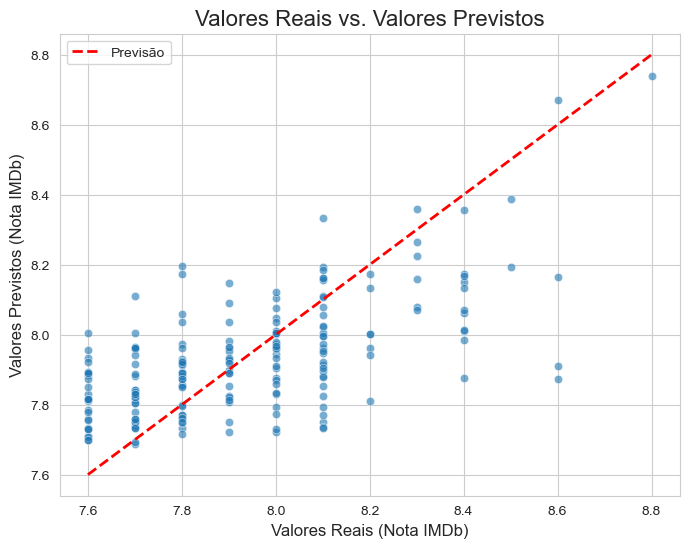

In [31]:
# Implementação do modelo (com todas as ocorrências de gênero)

# Engenharia e seleção de features

# Transformando a coluna 'Genre' em múltiplas colunas (Multi-Hot Encoding)
# Cada gênero se torna uma feature binária (0 ou 1).
genre_dummies = df_imputed['Genre'].str.get_dummies(sep=', ')
df_model = pd.concat([df_imputed, genre_dummies], axis=1)

# Definindo as features para o modelo
numeric_features = ['Meta_score', 'No_of_Votes', 'Gross', 'Runtime']
genre_features = genre_dummies.columns.tolist()
features = numeric_features + genre_features
target = 'IMDB_Rating'

X = df_model[features]
y = df_model[target]


# Divisão dos dados em treino e teste (80% para treino e 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Avaliação com os dados de teste
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Apresentação dos resultados
print("--- Métricas de Avaliação do Modelo ---")
print(f"MAE (Erro Médio Absoluto): {mae:.4f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")

print("\n--- Interpretação ---")
print(f"O modelo, em média, erra a previsão da nota por {mae:.2f} pontos.")
print(f"O R² de {r2:.2f} significa que o modelo consegue explicar aproximadamente {r2:.0%} da variabilidade da nota do IMDb.")
print("\n")

# Gráfico de diagnóstico: valores eais vs. valores previstos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2, label='Previsão')
plt.title('Valores Reais vs. Valores Previstos', fontsize=16)
plt.xlabel('Valores Reais (Nota IMDb)', fontsize=12)
plt.ylabel('Valores Previstos (Nota IMDb)', fontsize=12)
plt.legend()
plt.show()

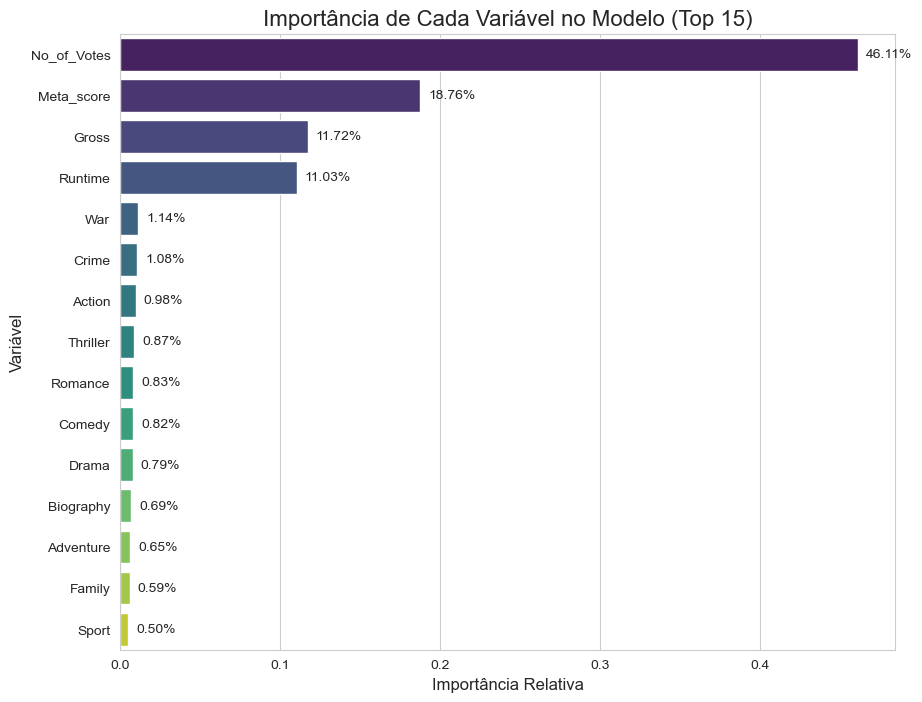

In [32]:
# Analisando a importância das variáveis (Feature Importance)

# Criando um df para visualizar a importância de cada variável
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)


# Criando o gráfico de barras para visualizar a importância
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')

plt.title('Importância de Cada Variável no Modelo (Top 15)', fontsize=16)
plt.xlabel('Importância Relativa', fontsize=12)
plt.ylabel('Variável', fontsize=12)

# Rotulagem dos dados
for patch in ax.patches:
    width = patch.get_width()
    y = patch.get_y()
    height = patch.get_height()
    ax.text(width + 0.005, y + height/2, f'{width:.2%}', va='center') # Formata como porcentagem

plt.show()

##**Questão 4: Previsão para 'The Shawshank Redemption'**

In [33]:
# Previsão para 'The Shawshank Redemption'

# Criando um dicionário com os dados do filme fornecidos na questão
shawshank_data = {
    'Meta_score': 80.0,
    'No_of_Votes': 2343110,
    'Gross': 28341469,
    'Runtime': 142,
    'Genre': 'Drama'
}

# Criando um df a partir do dicionário
new_movie_df = pd.DataFrame([shawshank_data])

# Engenharia de Features - apliquei a mesma transformação de gênero que o modelo espera
new_movie_genres = new_movie_df['Genre'].str.get_dummies(sep=', ')
new_movie_features = pd.concat([new_movie_df[numeric_features], new_movie_genres], axis=1)

# Garantindo que o df final tenha todas as colunas do modelo
# `reindex` garante a mesma ordem e a presença de todas as colunas de X,
# preenchendo com 0 os gêneros que o filme não possui
final_input = new_movie_features.reindex(columns=features, fill_value=0)

# Realizando a previsão com o modelo já treinado
predicted_rating = model.predict(final_input)

# Apresentando o resultado
print("--- Previsão da Nota para 'The Shawshank Redemption' ---")
print(f"A nota prevista pelo modelo é: {predicted_rating[0]:.2f}")

--- Previsão da Nota para 'The Shawshank Redemption' ---
A nota prevista pelo modelo é: 8.76


##**Questão 5: Salvando o modelo**

In [34]:
# Salvando o modelo

# Nomeando o arquivo .pkl
nome_arquivo_modelo = 'modelo_nota_imdb.pkl'

# Salvando o modelo treinado
joblib.dump(model, nome_arquivo_modelo)

print(f"\nModelo salvo com sucesso como '{nome_arquivo_modelo}'!")


Modelo salvo com sucesso como 'modelo_nota_imdb.pkl'!


##**Conclusão e Recomendação para o Estúdio**

Após uma análise exploratória detalhada e a construção de um modelo preditivo, este relatório apresenta os principais insights para orientar a próxima produção do estúdio. O objetivo foi identificar os fatores que maximizam a chance de sucesso de um filme, tanto em termos de faturamento quanto de aclamação do público.

---

#### **Principais Fatores de Sucesso Identificados**

A análise revelou três pilares fundamentais para o sucesso de um filme:

- **Popularidade (Engajamento do Público):** O número de votos (No_of_Votes) é o fator com a correlação mais forte com o faturamento. Filmes que geram "buzz" e mobilizam o público têm uma chance muito maior de se tornarem um sucesso de bilheteria.

- **Qualidade Percebida (Nota IMDb):** Embora uma nota alta não garanta, por si só, um alto faturamento, ela funciona como um pré-requisito. Os filmes mais rentáveis do dataset quase sempre possuem notas excelentes (acima de 8.0).

- **A Escolha Estratégica do Gênero:** A análise de faturamento por gênero, corrigida para garantir a robustez estatística, mostrou que certos gêneros têm um retorno mediano significativamente maior.

---

#### **Recomendação Estratégica**

Com base nos dados, a recomendação para a **PProductions** é focar em uma de duas estratégias principais:

- **Estratégia de Blockbuster (Alto Retorno):** Para maximizar a expectativa de faturamento, o estúdio deve investir em gêneros de apelo universal, como Animação e Aventura. A análise mostrou que estes são os gêneros com o maior faturamento mediano, combinando sucesso comercial com alta qualidade percebida pelo público.

- **Estratégia de Prestígio (Foco em Qualidade):** Se o objetivo for construir uma reputação de excelência e competir por prêmios, gêneros como Guerra (War) e Drama são bem avaliados pelo público e bem aceitos, embora com um retorno financeiro mediano mais modesto.

---

#### **Modelo Preditivo**

Adicionalmente, foi desenvolvido um modelo de Machine Learning (**Random Forest**) capaz de prever a nota do IMDb de um filme com alta precisão (RMSE de aproximadamente 0.20). Este modelo pode ser utilizado internamente pelo estúdio como uma ferramenta auxiliar para avaliar o potencial de novos projetos com base em suas características.
